In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\yasme\Downloads\data.csv'
df = pd.read_csv(file_path)

# Inspect the first few rows of the dataframe
print("First few rows of the data:")
print(df.head())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Display data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Handle missing values (example: drop rows with any missing values)
df_cleaned = df.dropna()

# Alternatively, you can fill missing values with a specific value (example: fill with 0)
# df_cleaned = df.fillna(0)

# Convert data types if necessary (example: convert a column to datetime)
# df_cleaned['date_column'] = pd.to_datetime(df_cleaned['date_column'])

# Normalize or scale data if necessary (example: scale numerical columns)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_cleaned['numeric_column'] = scaler.fit_transform(df_cleaned[['numeric_column']])

# Save the cleaned dataframe to a new CSV file
output_file_path = r'C:\Users\yasme\Downloads\data_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)

print(f"\nPreprocessed data saved to {output_file_path}")


First few rows of the data:
   vehicle_id           entry_time            exit_time
0           1  2024-01-01 08:00:00  2024-01-01 10:00:00
1           2  2024-01-01 09:00:00  2024-01-01 11:30:00
2           3  2024-01-01 11:00:00  2024-01-01 13:00:00
3           4  2024-01-01 12:30:00  2024-01-01 14:00:00
4           5  2024-01-01 14:00:00  2024-01-01 16:30:00

Summary statistics:
       vehicle_id
count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000

Data types of each column:
vehicle_id     int64
entry_time    object
exit_time     object
dtype: object

Preprocessed data saved to C:\Users\yasme\Downloads\data_cleaned.csv


In [8]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\yasme\Downloads\data.csv'
df = pd.read_csv(file_path)

# Convert 'entry_time' and 'exit_time' columns to datetime
df['entry_time'] = pd.to_datetime(df['entry_time'])
df['exit_time'] = pd.to_datetime(df['exit_time'])

# Calculate the duration of stay for each vehicle
df['duration'] = df['exit_time'] - df['entry_time']

# Display the first few rows to confirm the changes
print("First few rows after preprocessing:")
print(df.head())

# Save the cleaned dataframe to a new CSV file
output_file_path = r'C:\Users\yasme\Downloads\data_cleaned.csv'
df.to_csv(output_file_path, index=False)

print(f"\nPreprocessed data saved to {output_file_path}")


First few rows after preprocessing:
   vehicle_id          entry_time           exit_time        duration
0           1 2024-01-01 08:00:00 2024-01-01 10:00:00 0 days 02:00:00
1           2 2024-01-01 09:00:00 2024-01-01 11:30:00 0 days 02:30:00
2           3 2024-01-01 11:00:00 2024-01-01 13:00:00 0 days 02:00:00
3           4 2024-01-01 12:30:00 2024-01-01 14:00:00 0 days 01:30:00
4           5 2024-01-01 14:00:00 2024-01-01 16:30:00 0 days 02:30:00

Preprocessed data saved to C:\Users\yasme\Downloads\data_cleaned.csv


In [9]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [1]:
import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'<"C:\Users\yasme\Downloads\tesseract-ocr-w64-setup-5.4.0.20240606 (1).exe">'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

In [ ]:
import cv2
import pytesseract
from PIL import Image
import os
from skimage.metrics import structural_similarity as ssim

# Path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\yasme\Downloads\archive (1)\tesseract.exe'

# Path to dataset of preprocessed vehicle images
dataset_path = r'C:\Users\yasme\Downloads\archive (1)\preprocessed_images'

# Function to match vehicle image with dataset
def match_vehicle(image):
    for filename in os.listdir(dataset_path):
        dataset_image_path = os.path.join(dataset_path, filename)
        dataset_image = cv2.imread(dataset_image_path)
        
        # Convert dataset image and input image to grayscale
        dataset_gray = cv2.cvtColor(dataset_image, cv2.COLOR_BGR2GRAY)
        input_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Calculate Structural Similarity Index (SSIM)
        ssim_index, _ = ssim(dataset_gray, input_gray, full=True)
        
        # Set a threshold for SSIM value to consider it a match
        if ssim_index > 0.7:  # Adjust threshold as per your dataset and images
            # Perform OCR on matched image to get license plate
            try:
                text = pytesseract.image_to_string(Image.fromarray(dataset_image), config='--psm 7')
                return text.strip()
            except Exception as e:
                print(f"Error during OCR: {e}")
                return None
    
    return None

# Initialize video capture object
cap = cv2.VideoCapture(0)  # Change to your camera index or video file path if needed

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image from camera.")
        break
    
    # Perform vehicle detection using your preferred method (e.g., object detection)
    # For simplicity, assume 'frame' contains the captured frame from the camera
    # Replace with your actual vehicle detection code here
    
    # Here 'vehicle_image' is assumed to be the region of interest (ROI) containing the vehicle
    vehicle_image = frame  # Example: Using the whole frame as vehicle_image
    
    # Process the 'vehicle_image'
    matched_plate = match_vehicle(vehicle_image)
    
    if matched_plate:
        print(f"License Plate: {matched_plate}")
        print("Match: True")
    else:
        print("Match: False")
    
    # Display the frame with bounding boxes, if any
    cv2.imshow('Vehicle Detection', frame)
    
    # Exit loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [2]:
pip install opencv-python pytesseract pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import pandas as pd
import pytesseract

# Path to Tesseract executable (replace with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\yasme\Downloads\archive (1)\tesseract.exe'

# Function to extract license plate from an image
def extract_license_plate(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    if image is not None:
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Perform OCR using pytesseract
        custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --dpi 300'
        extracted_text = pytesseract.image_to_string(gray_image, config=custom_config)
        
        # Return the extracted text (license plate)
        return extracted_text.strip()
    else:
        return None

# Load your dataset into a DataFrame (assuming 'google_images_filenames.csv' contains 'File Name' column)
df = pd.read_csv('C:/Users/yasme/Downloads/google_images_filenames.csv')

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_path = row['File Name']  # Assuming 'File Name' contains the full path to each image
    license_plate = extract_license_plate(image_path)
    
    # Update the DataFrame with the extracted license plate number
    df.at[index, 'License Plate'] = license_plate

# Save the updated DataFrame back to CSV or another file format if needed
df.to_csv('C:/Users/yasme/Downloads/data_with_license_plates.csv', index=False)

print("License plate extraction completed and saved to CSV.")


License plate extraction completed and saved to CSV.


In [49]:
# Assign cleaned dataframe back to the original variable or save to a new CSV file
# For example, to save to a new CSV file:
cleaned_df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


In [2]:
import cv2
import pandas as pd
import pytesseract

# Path to Tesseract executable (replace with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\yasme\Downloads\archive (1)\tesseract.exe'

# Function to extract license plate from an image
def extract_license_plate(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    if image is not None:
        # Convert image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Perform OCR using pytesseract
        custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --dpi 300'
        extracted_text = pytesseract.image_to_string(gray_image, config=custom_config)
        
        # Return the extracted text (license plate)
        return extracted_text.strip()
    else:
        return None

# Load your dataset into a DataFrame (assuming 'google_images_filenames.csv' contains 'File Name' and 'License Plate' columns)
df = pd.read_csv(r'C:\Users\yasme\Downloads\google_images_filenames.csv')

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_path = row['File Name']  # Assuming 'File Name' contains the full path to each image
    license_plate = extract_license_plate(image_path)
    
    # Update the DataFrame with the extracted license plate number
    df.at[index, 'License Plate'] = license_plate

# Save the updated DataFrame back to CSV or another file format if needed
df.to_csv(r'C:\Users\yasme\Downloads\google_images_filenames.csv', index=False)

print("License plate extraction completed and saved to CSV.")


License plate extraction completed and saved to CSV.


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\yasme\Downloads\google_images_filenames.csv')

# Extract the 'File Name' column
image_paths = df['File Name']

# Display the first few image paths
print(image_paths.head())

# Save the image paths to a text file if needed
with open(r'C:\Users\yasme\Downloads\image_paths.txt', 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print("Image paths have been saved to 'image_paths.txt'.")


0    0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG...
1    0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG...
2    00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd38...
3    00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd38...
4    018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd38...
Name: File Name, dtype: object
Image paths have been saved to 'image_paths.txt'.


In [2]:
import cv2
import pytesseract
import pandas as pd
import re
import os

# Path to Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\yasme\Downloads\archive (1)\tesseract.exe'

# Load the dataset into a DataFrame
df = pd.read_csv(r'C:\Users\yasme\Downloads\google_images_filenames.csv')

# Directory to save screenshots
output_directory = 'C:/Users/yasme/Downloads/screenshot_outputs/'
os.makedirs(output_directory, exist_ok=True)

# Function to preprocess the image for better OCR accuracy
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    _, thresh_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_image

# Function to extract text from a license plate image using Tesseract OCR
def extract_text(image):
    custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    text = pytesseract.image_to_string(image, config=custom_config)
    text = text.strip()
    
    # Validate the text using a regular expression for license plate formats
    match = re.fullmatch(r'[A-Z0-9]{1,8}', text)  # Adjust regex based on your license plate format
    if match:
        return text
    else:
        return ""

# Function to check if license plate is in the database
def check_license_plate(plate):
    return plate in df['License Plate'].values

# Load a pre-trained Haar Cascade for license plate detection
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')

# Initialize video capture (0 for default camera)
cap = cv2.VideoCapture(0)

correct_output_found = False

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plates = plate_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(25, 25))
    
    for (x, y, w, h) in plates:
        plate_image = frame[y:y+h, x:x+w]
        
        # Preprocess the plate image
        processed_plate_image = preprocess_image(plate_image)
        
        # Extract text from the plate image
        license_plate_text = extract_text(processed_plate_image)
        print(f"Extracted Text: {license_plate_text}")
        
        if license_plate_text:
            is_authorized = check_license_plate(license_plate_text)
            if is_authorized:
                output_text = f"Authorized: {license_plate_text}"
                color = (0, 255, 0)  # Green for authorized
            else:
                output_text = f"Not Authorized: {license_plate_text}"
                color = (0, 0, 255)  # Red for not authorized
            
            # Display output text on console
            print(output_text)
            
            # Display output text on frame
            cv2.putText(frame, output_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
            
            # Save screenshot of the plate
            screenshot_path = os.path.join(output_directory, f"plate_{license_plate_text}.png")
            cv2.imwrite(screenshot_path, plate_image)
            
            # Break the loop after finding a valid license plate
            correct_output_found = True
            break
    
    cv2.imshow('License Plate Recognition', frame)
    
    if correct_output_found or (cv2.waitKey(1) & 0xFF == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()

# Once correct plate is found, display it in a separate window
if correct_output_found:
    print(f"Correct plate found: {license_plate_text}")
    recognized_plate = cv2.imread(screenshot_path)
    cv2.imshow('Recognized Plate', recognized_plate)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Extracted Text: 
Extracted Text: 22BH6517
Not Authorized: 22BH6517
Correct plate found: 22BH6517


Movement Patterns:
                     entry_time           exit_time        duration
vehicle_id                                                        
1          2024-07-04 08:00:00 2024-07-04 10:00:00 0 days 02:00:00
2          2024-07-04 08:15:00 2024-07-04 10:15:00 0 days 02:00:00
3          2024-07-04 08:30:00 2024-07-04 10:30:00 0 days 02:00:00
4          2024-07-04 09:30:00 2024-07-04 10:30:00 0 days 01:00:00
Parking Insights:
   parking_lot  occupancy
0           A          3
1           B          2
2           C          1


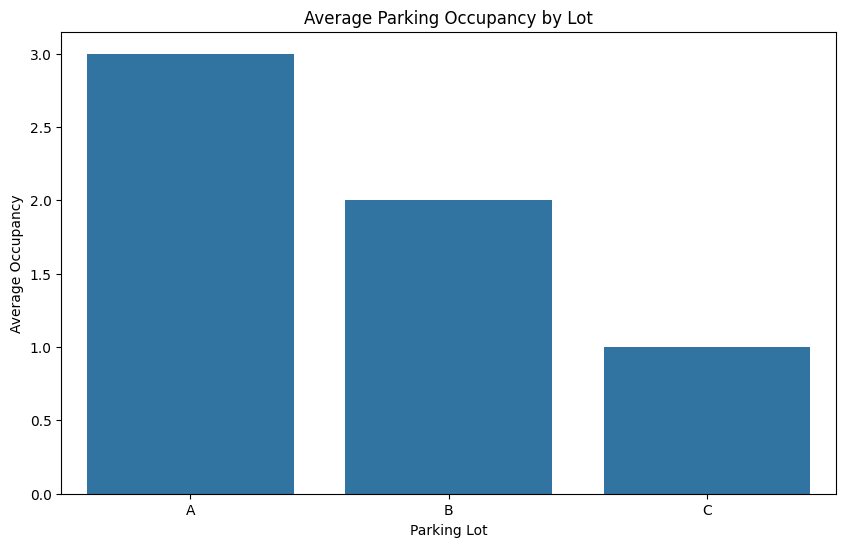

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    # Load the actual data here
    data = pd.DataFrame({
        'vehicle_id': [1, 2, 3, 1, 2, 4],
        'entry_time': ['2024-07-04 08:00:00', '2024-07-04 08:15:00', '2024-07-04 08:30:00', 
                       '2024-07-04 09:00:00', '2024-07-04 09:15:00', '2024-07-04 09:30:00'],
        'exit_time': ['2024-07-04 09:00:00', '2024-07-04 09:15:00', '2024-07-04 10:30:00',
                      '2024-07-04 10:00:00', '2024-07-04 10:15:00', '2024-07-04 10:30:00'],
        'parking_lot': ['A', 'A', 'B', 'B', 'A', 'C']
    })
    data['entry_time'] = pd.to_datetime(data['entry_time'])
    data['exit_time'] = pd.to_datetime(data['exit_time'])
    return data

def analyze_data(data):
    # Analyze vehicle movement patterns
    movement_patterns = data.groupby('vehicle_id').agg({
        'entry_time': 'min',
        'exit_time': 'max'
    })
    movement_patterns['duration'] = movement_patterns['exit_time'] - movement_patterns['entry_time']
    print("Movement Patterns:\n", movement_patterns)

    # Generate insights on parking occupancy
    parking_insights = data.groupby('parking_lot').size().reset_index(name='occupancy')
    print("Parking Insights:\n", parking_insights)

    # Visualize insights
    plt.figure(figsize=(10, 6))
    sns.barplot(x='parking_lot', y='occupancy', data=parking_insights)
    plt.title('Average Parking Occupancy by Lot')
    plt.xlabel('Parking Lot')
    plt.ylabel('Average Occupancy')
    plt.show()

def main():
    data = load_data()
    analyze_data(data)

if __name__ == "__main__":
    main()
